In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA

In [33]:
# read data and fill blanks
df = pd.read_excel("breast-cancer-wisconsin.xlsx")
df["bareNuc"].fillna(df["bareNuc"].median(), inplace=True)
df.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [34]:
# get labels for benign and malignant classes
labels = df['class']
colors = []
for i in range(labels.size):
    color = "blue"
    if labels[i] == 2:
        color = "red"
    colors.append(color)

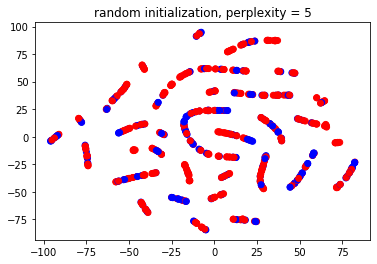

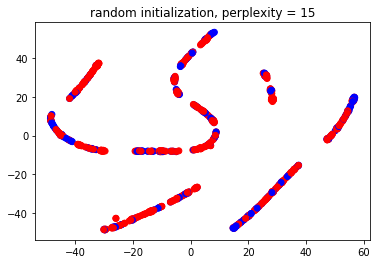

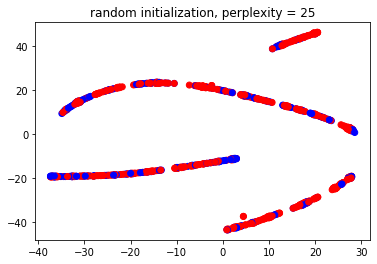

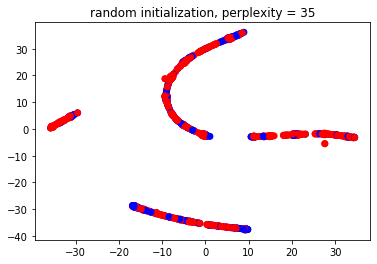

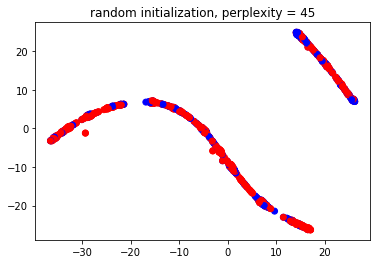

In [35]:
# random initial distribution
for p in range(5):
    perplexity = p * 10 + 5
    tsne = TSNE(n_components=2, perplexity=perplexity).fit_transform(df)
    plt.scatter(tsne[:, 0], tsne[:, 1], c=colors)
    plt.title("random initialization, perplexity = %d" % perplexity)
    plt.show()

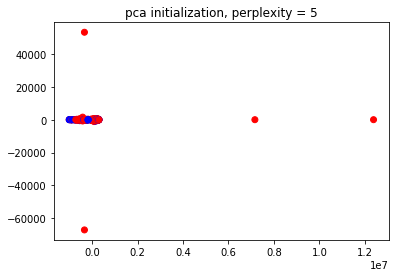

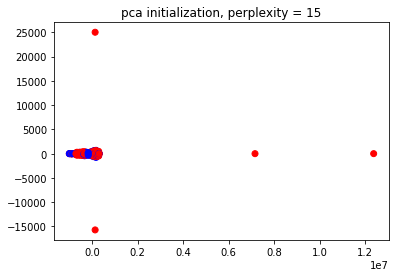

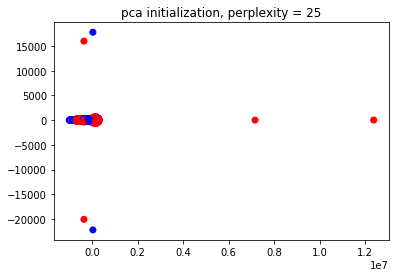

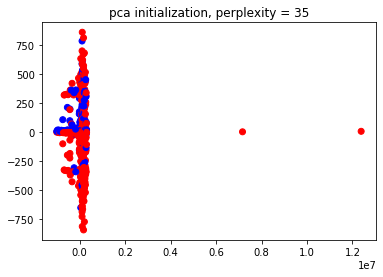

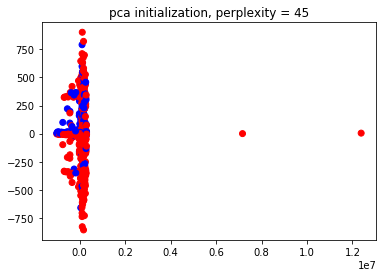

In [36]:
# pca initial distribution
for p in range(5):
    perplexity = p * 10 + 5
    tsne = TSNE(n_components=2, perplexity=perplexity, init='pca').fit_transform(df)
    plt.scatter(tsne[:, 0], tsne[:, 1], c=colors)
    plt.title("pca initialization, perplexity = %d" % perplexity)
    plt.show()

The embedding failed to seperate the 2 classes in most cases, 
especially for the random initialization. The PCA initialization
seems to perform better, but will produce outliers far outside of 
the main clusters when using a low perplexity. 

In [29]:
# read data 
df = pd.read_excel("Data_Cortex_Nuclear.xls")

# filter for the 2 classes and drop non numeric columns
c_sc_s = df.loc[df['class'] == 'c-SC-s']._get_numeric_data()
print('c-SC-s size: %d' %c_sc_s.shape[0])
t_sc_s = df.loc[df['class'] == 't-SC-s']._get_numeric_data()
print('t-SC-s size: %d' %t_sc_s.shape[0])

# fill missing values
c_sc_s = c_sc_s.fillna(c_sc_s.mean())
t_sc_s = t_sc_s.fillna(t_sc_s.mean())

# concatenate data
data = pd.concat([c_sc_s, t_sc_s])

# create label list
labels = []
for i in range(c_sc_s.shape[0]):
    labels.append("blue")
for i in range(t_sc_s.shape[0]):
    labels.append("red")

c-SC-s size: 135
t-SC-s size: 135


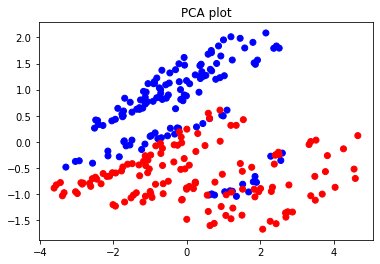

In [30]:
# PCA
pca = PCA(n_components=2)
pca.fit(data)
data_transformed = pca.transform(data)
plt.scatter(data_transformed[:,0],data_transformed[:,1],color=labels)
plt.title("PCA plot")
plt.show()

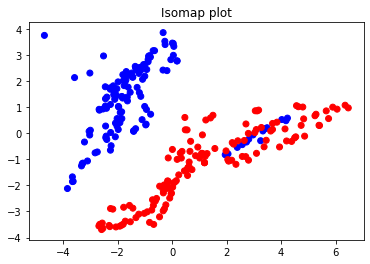

In [39]:
# Isomap
iso = Isomap(n_components=2, n_neighbors=15)
data_transformed = iso.fit_transform(data)
plt.scatter(data_transformed[:,0],data_transformed[:,1],color=labels)
plt.title("Isomap plot")
plt.show()

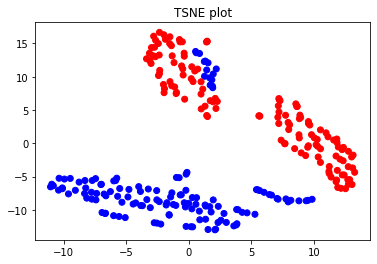

In [46]:
# tSNE
data_transformed = TSNE(n_components=2, perplexity=40).fit_transform(data)
plt.scatter(data_transformed[:,0],data_transformed[:,1],color=labels)
plt.title("TSNE plot")
plt.show()

Out of all 3 approaches, Isomap seems to group the data best, even though it 
assigns part of the data to the wrong cluster. TSNE seems to work similary 
well for the clustering of the 2 different classes, but might create extra
clusters for a third non existant class.
